<a href="https://colab.research.google.com/github/alaasiyamek2000/street-distortions-detection/blob/main/Full_Project_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# Web app for Illegal license Car Plates and street visual distortions detection.


---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.


## Steps

In this tutorial, we are going to cover:

- Install YOLOv8
- Data Collection and setup from Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- License Plate Detection and OCR
- Deploy the model on Roboflow and Gradio

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [55]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/107.7 GB disk)


In [56]:
from ultralytics import YOLO

from IPython.display import display, Image

###  Data Collection and setup from Roboflow Universe

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [3]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RMZDKE21yVJ9qeLHAuOZ")
project = rf.workspace("alaa-siyamek-agtoi").project("street-visual-distortions")
dataset = project.version(3).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.



Extracting Dataset Version Zip to Street-visual-distortions-3 in yolov8:: 100%|██████████| 40386/40386 [00:15<00:00, 2557.09it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 170MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Street-visual-distortions-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscr

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1698402844.38da68d5a2cc.1725.0  train_batch16725.jpg   val_batch1_pred.jpg
F1_curve.png					    train_batch16726.jpg   val_batch2_labels.jpg
P_curve.png					    train_batch16727.jpg   val_batch2_pred.jpg
PR_curve.png					    train_batch1.jpg	   weights
R_curve.png					    train_batch2.jpg
results.csv					    val_batch0_labels.jpg


/content


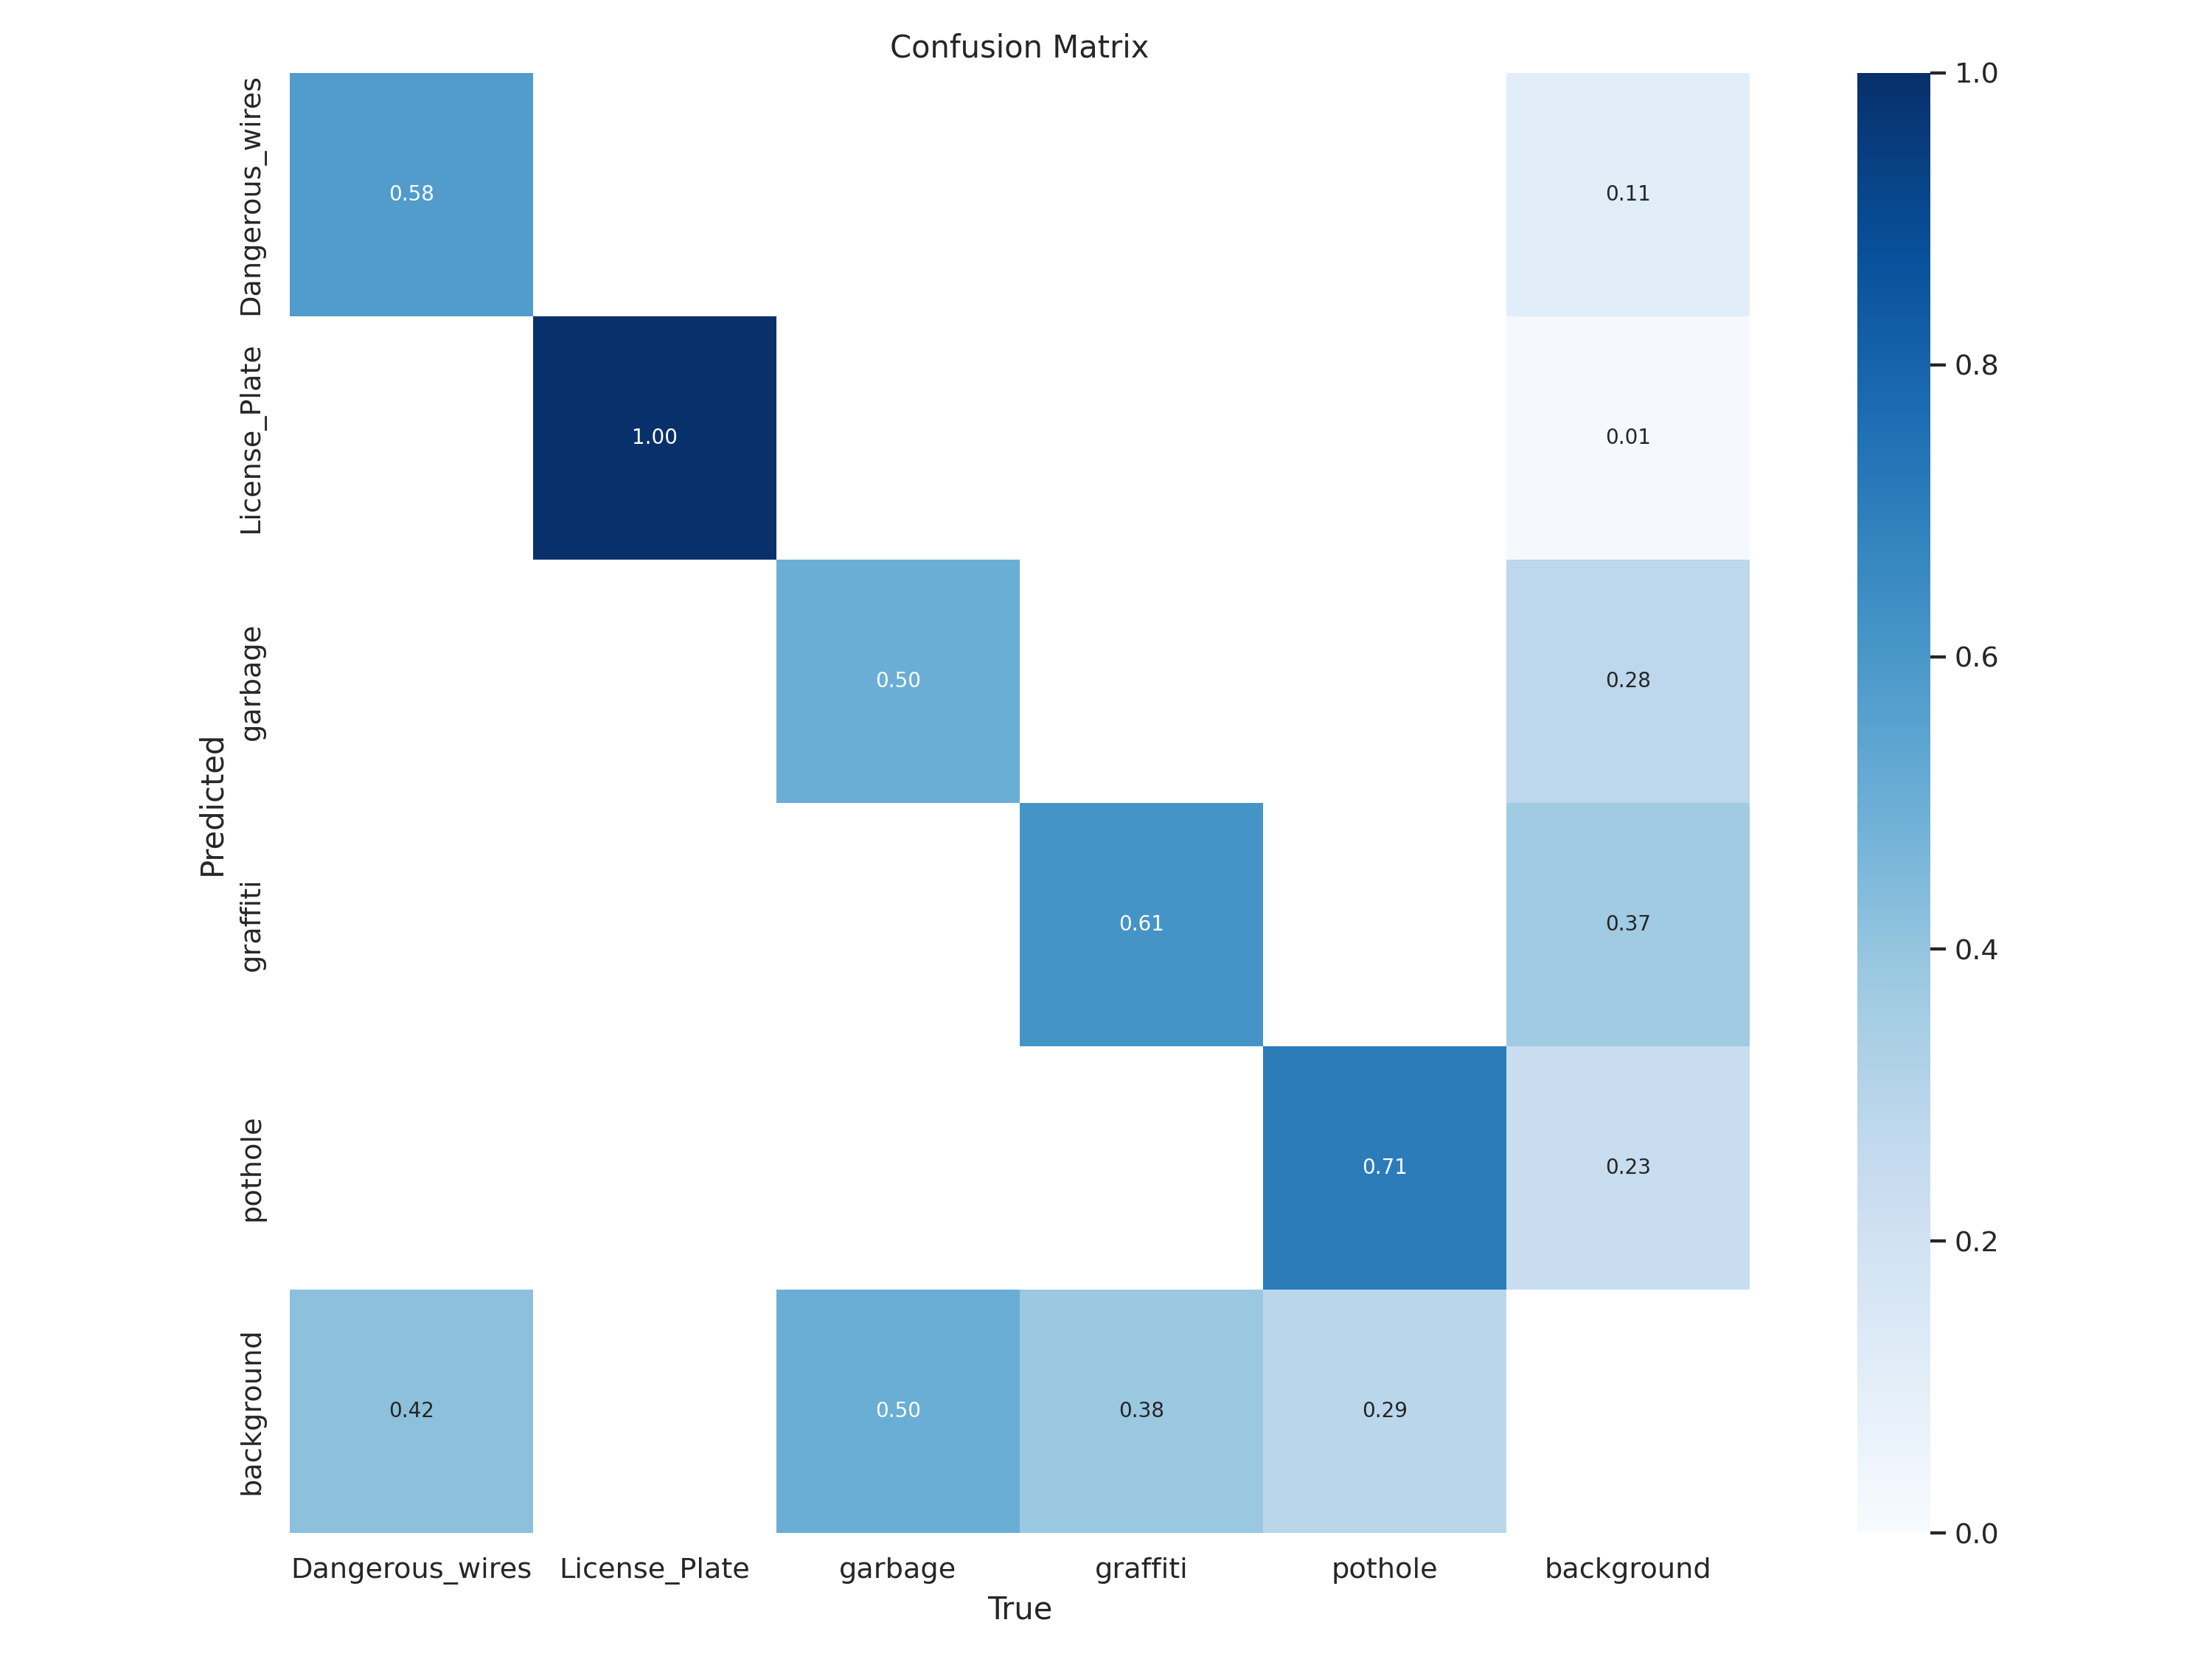

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


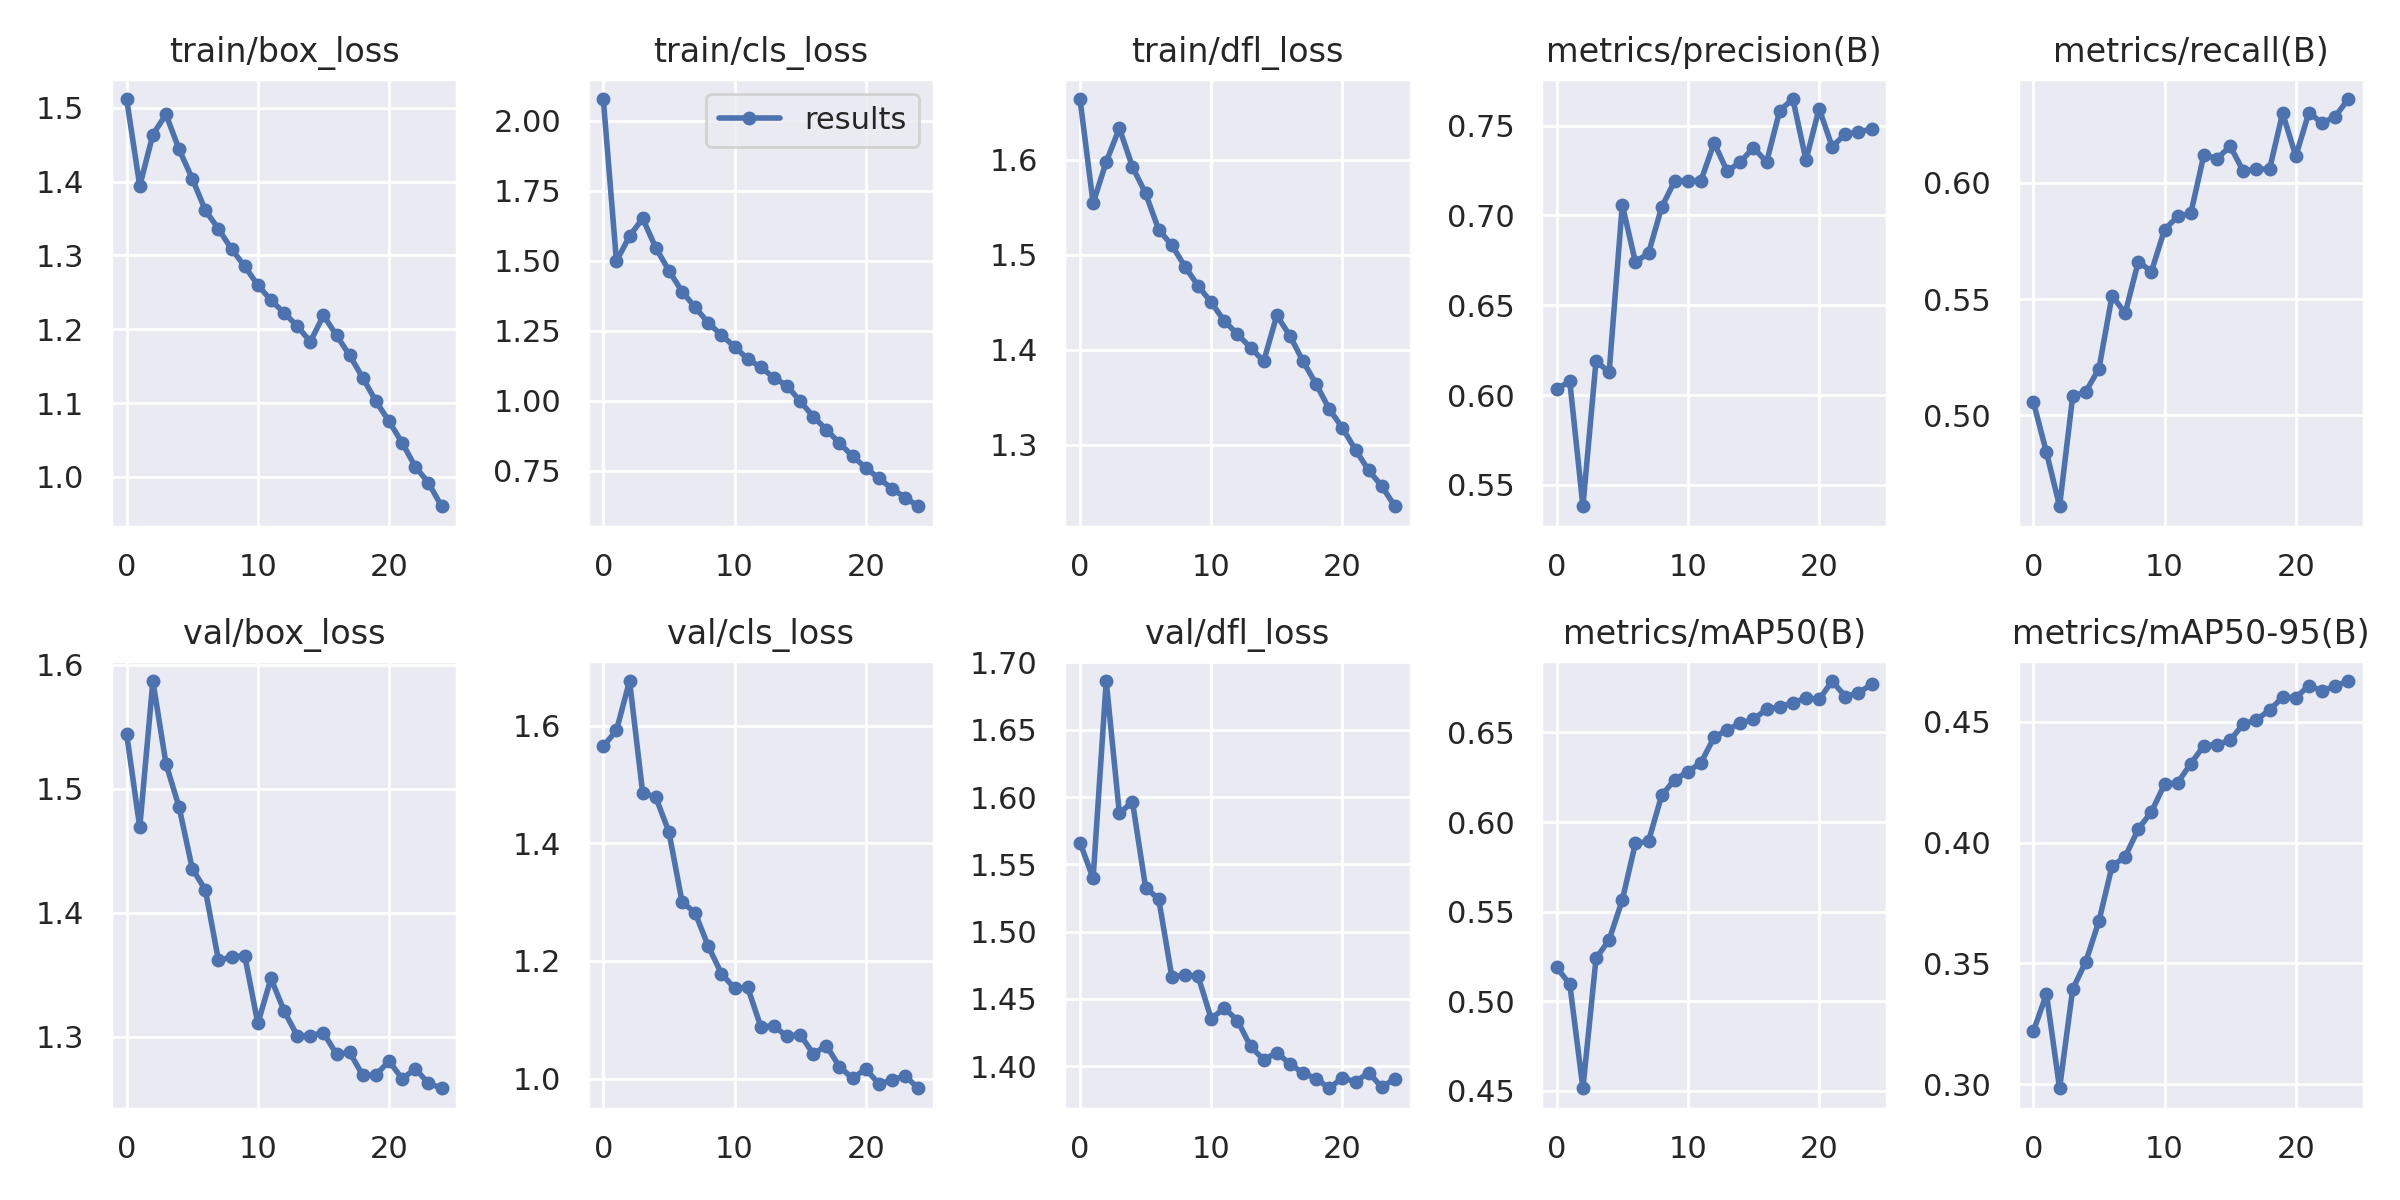

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


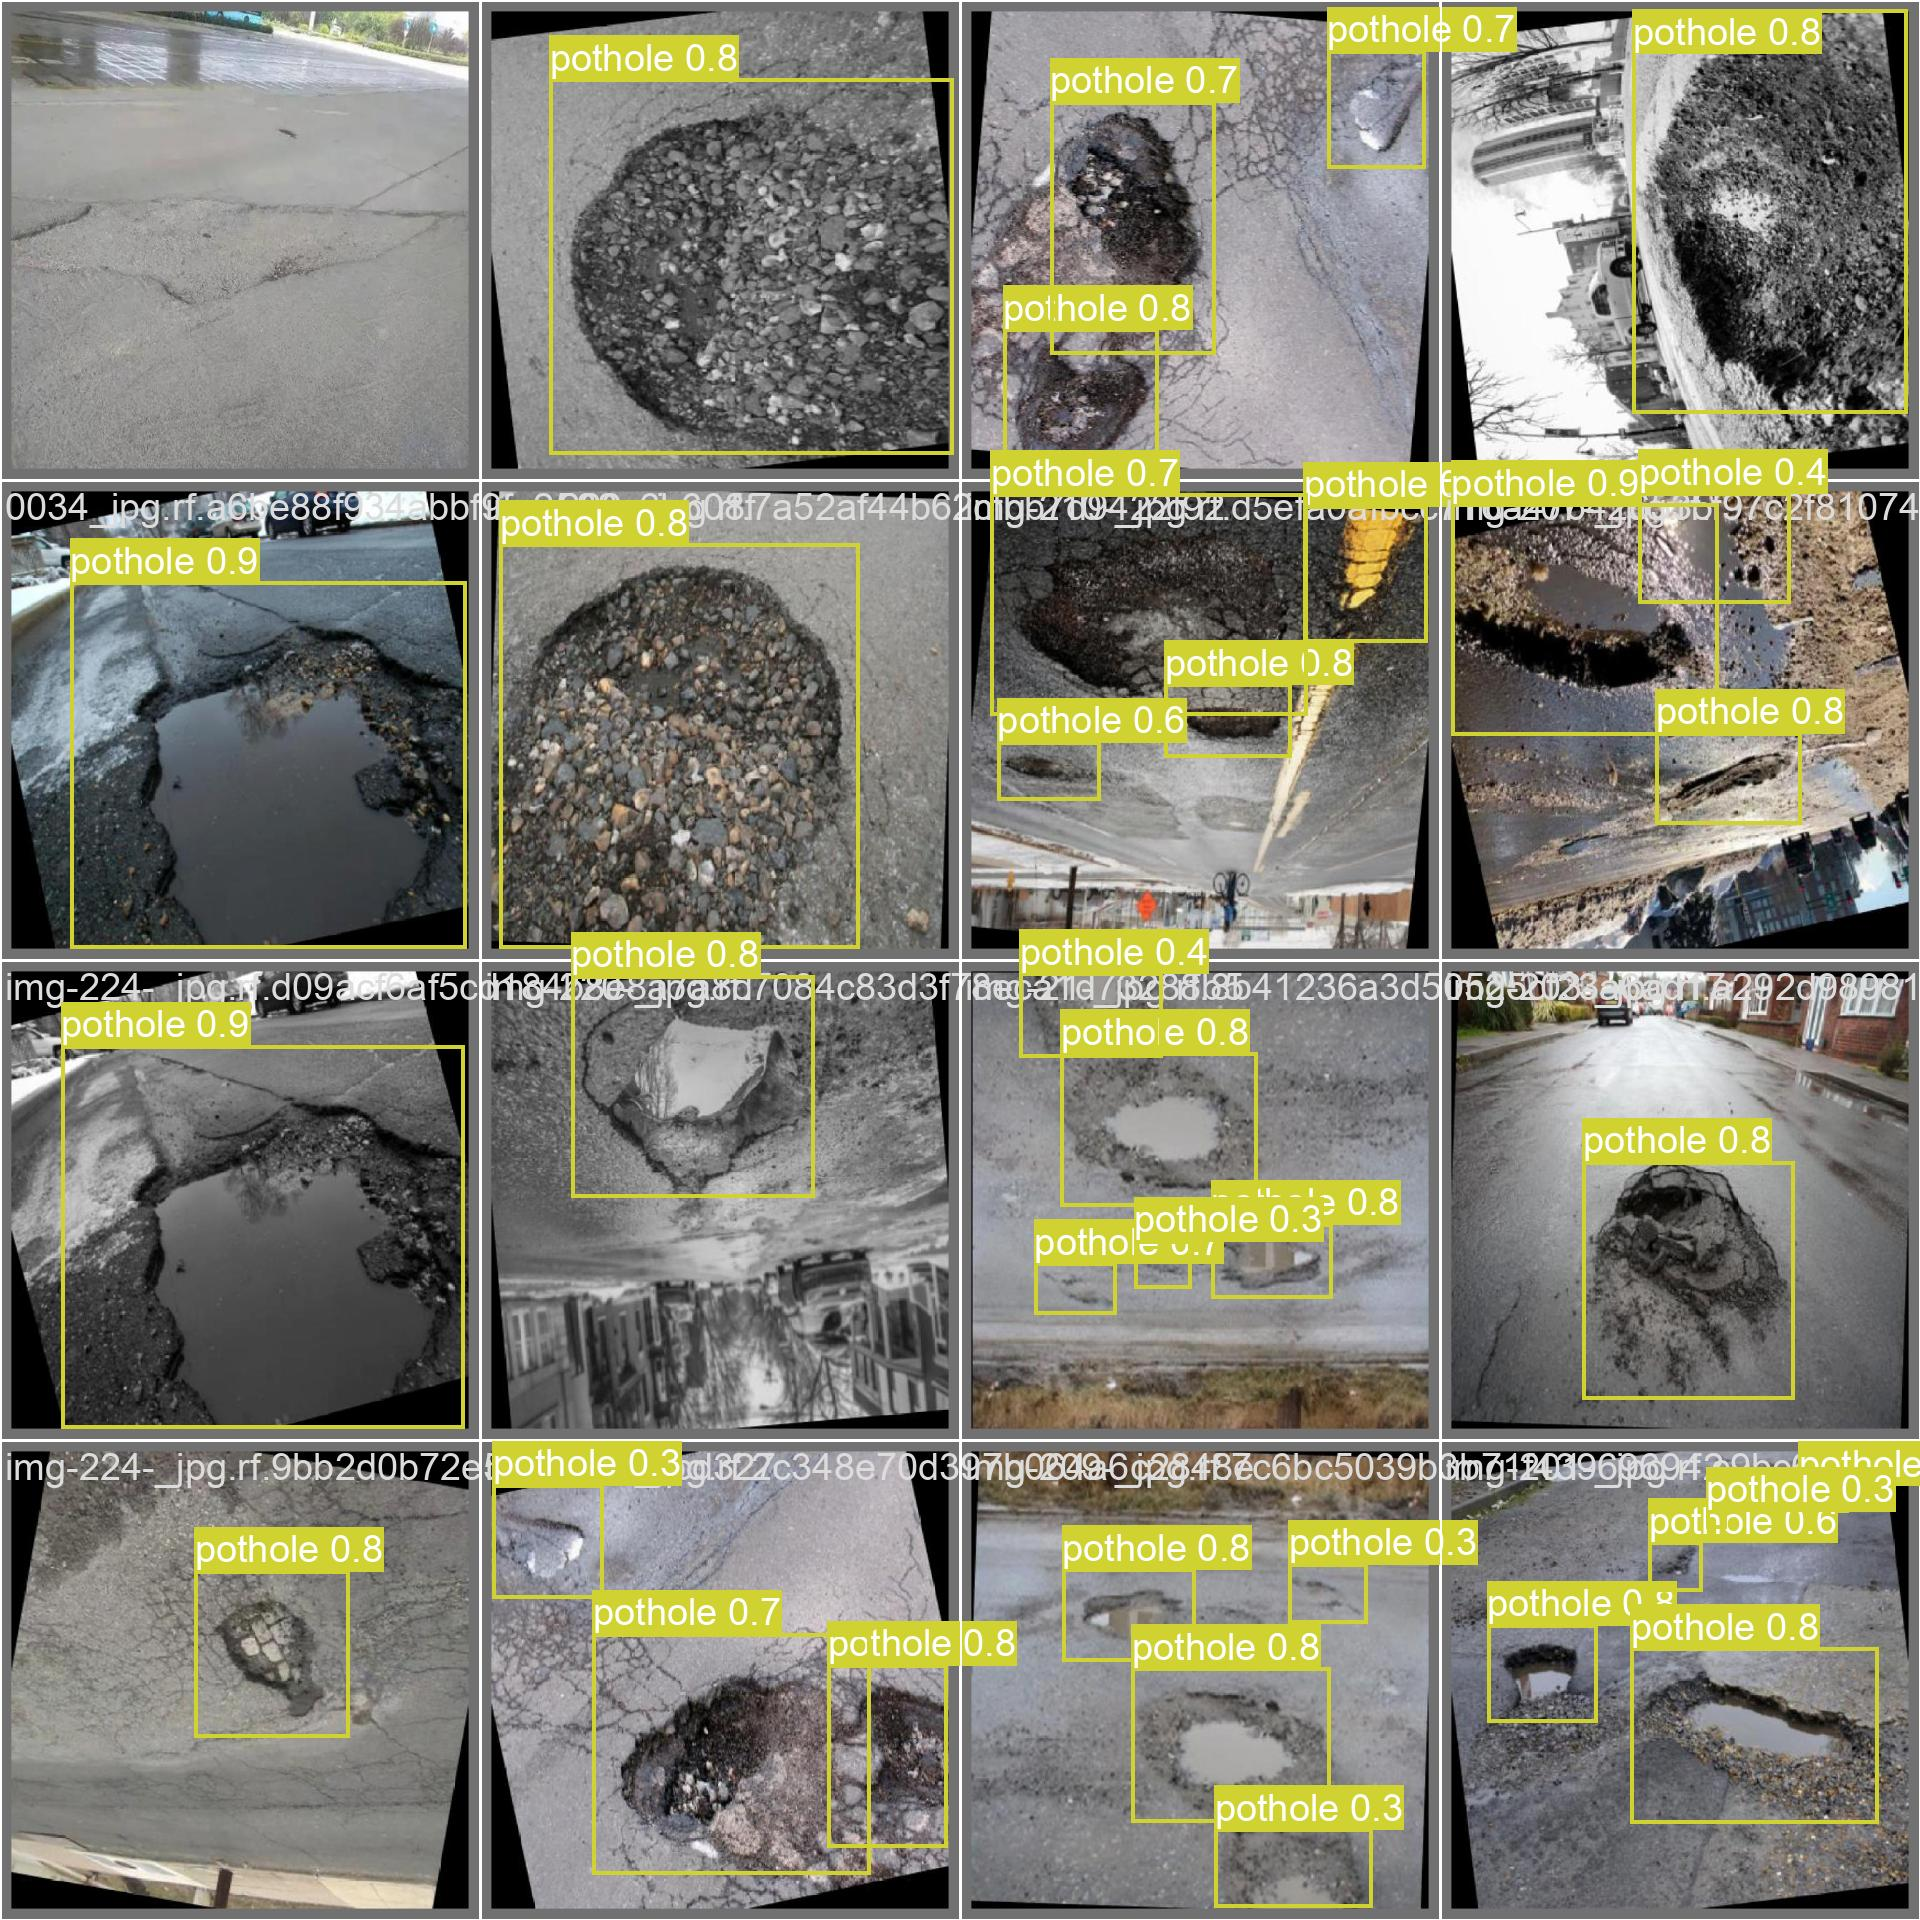

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

/content


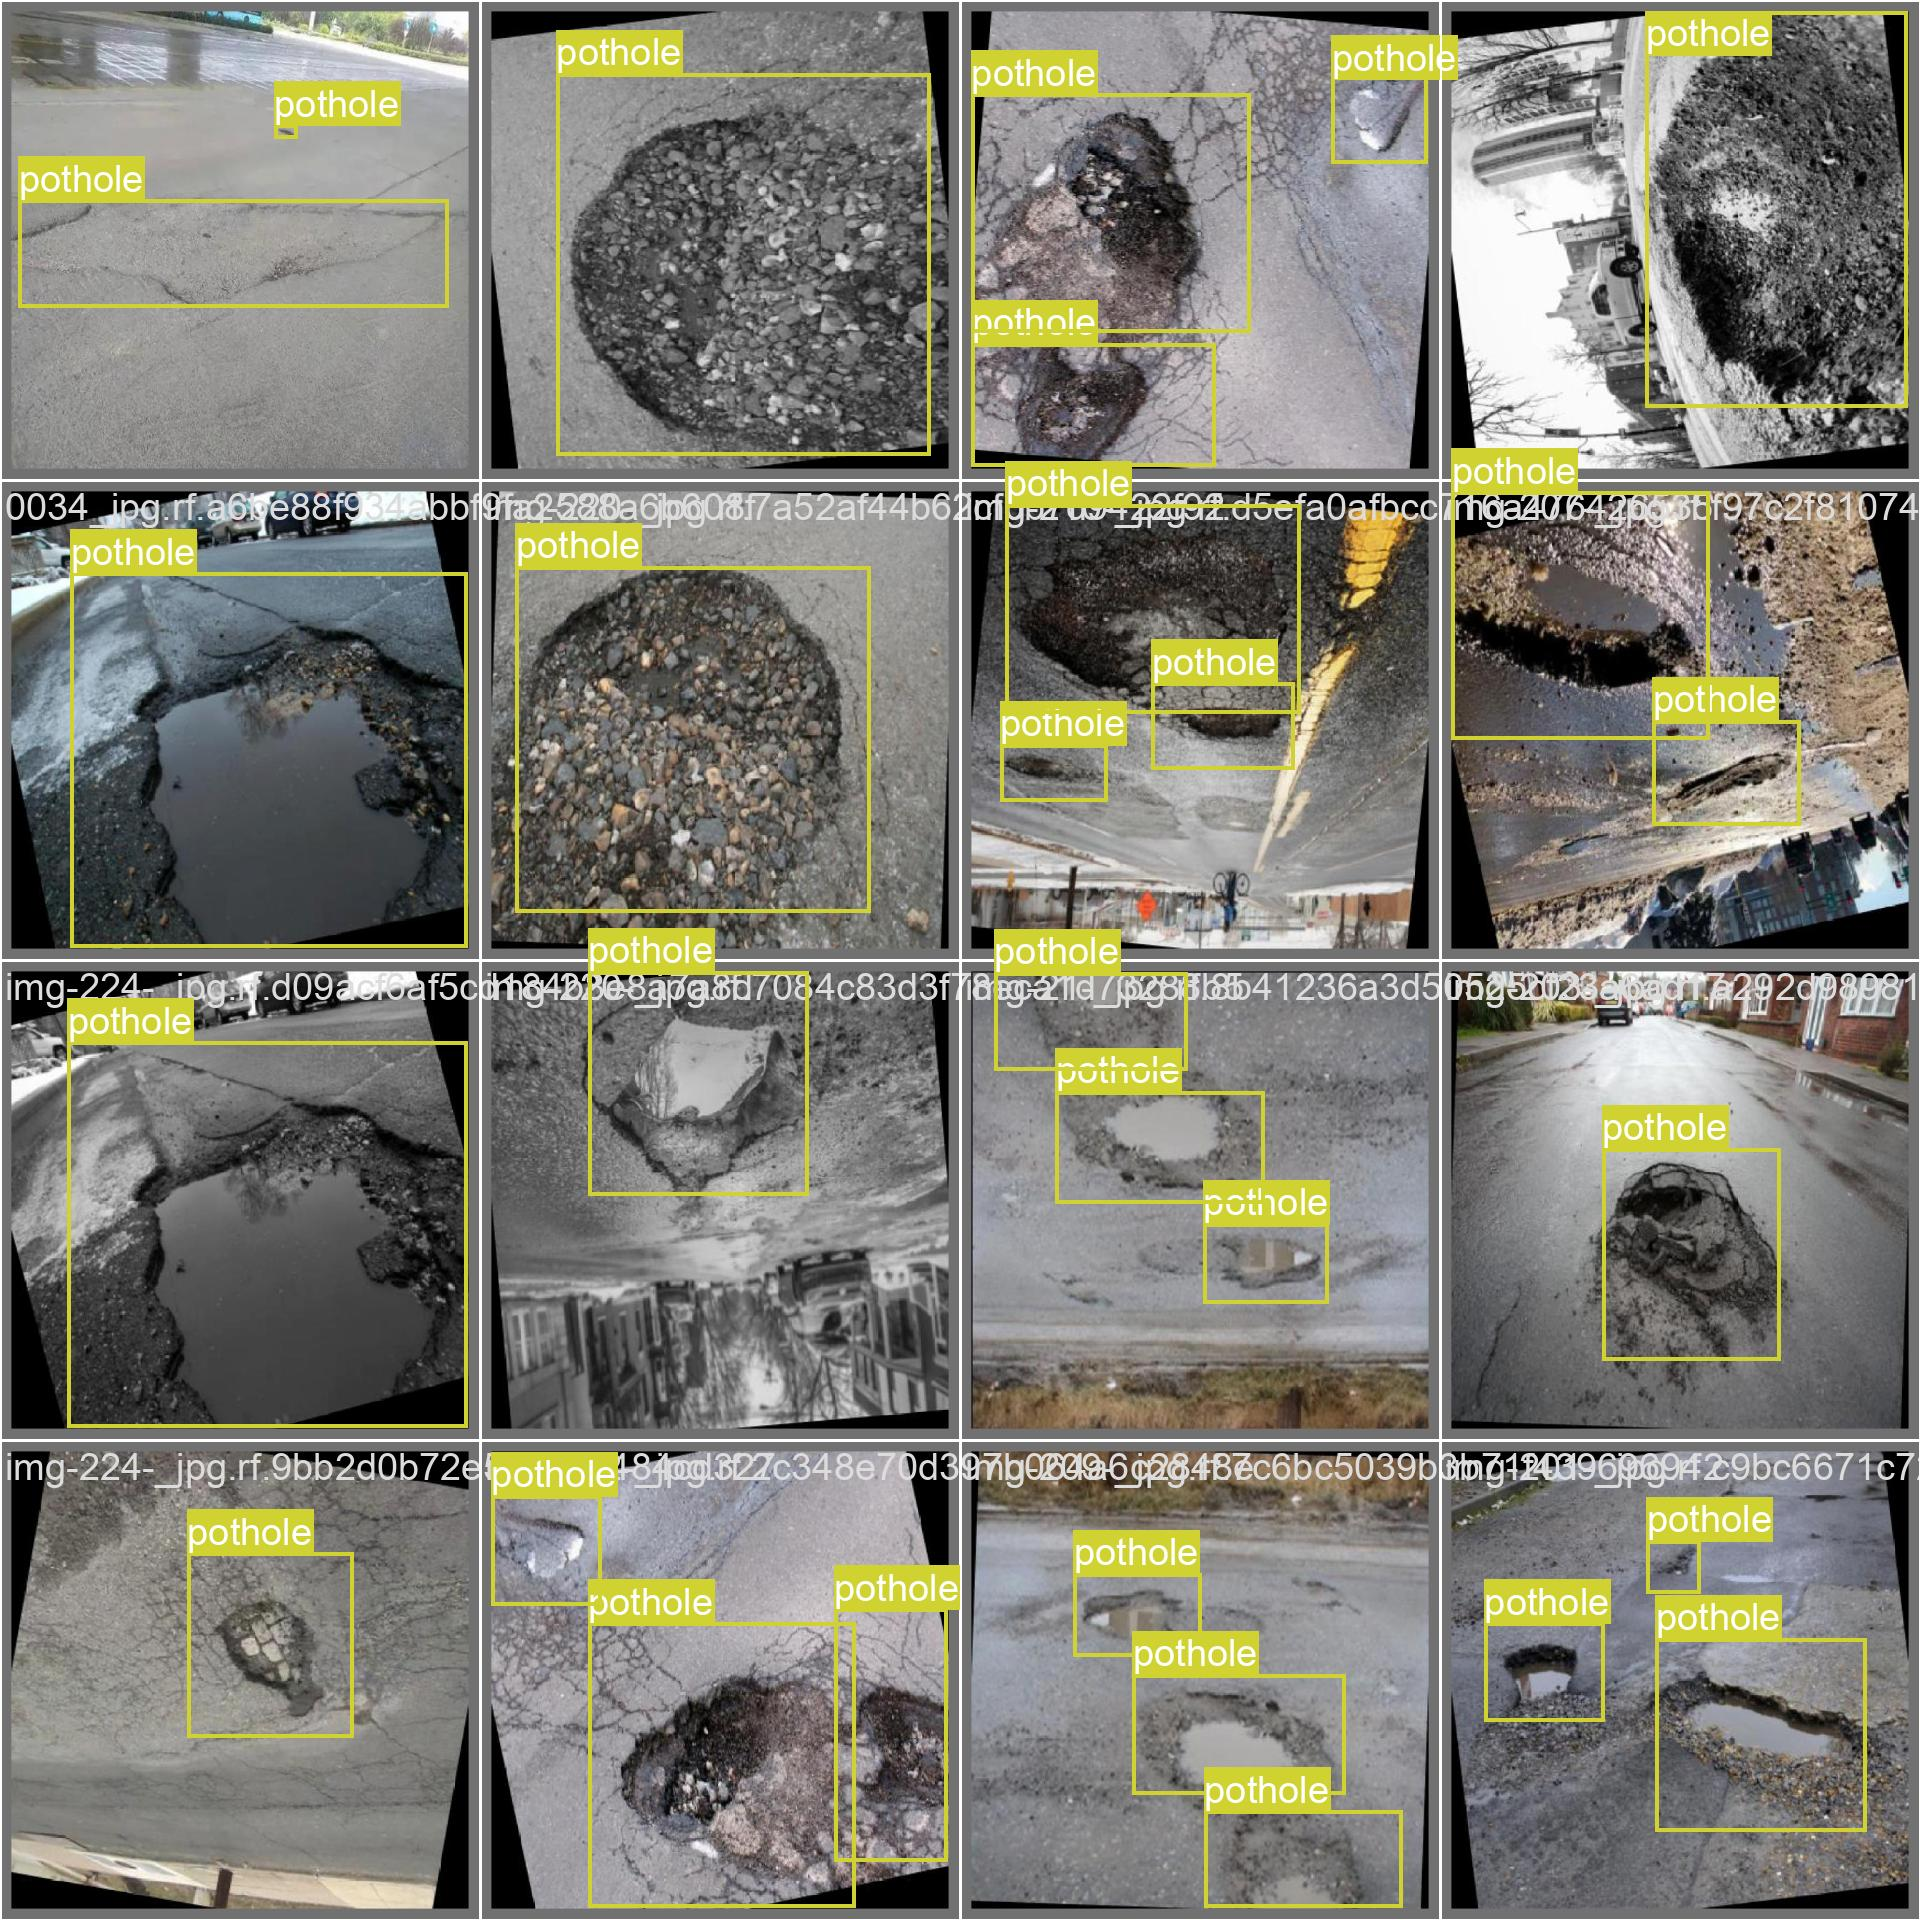

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg', width=600)

/content


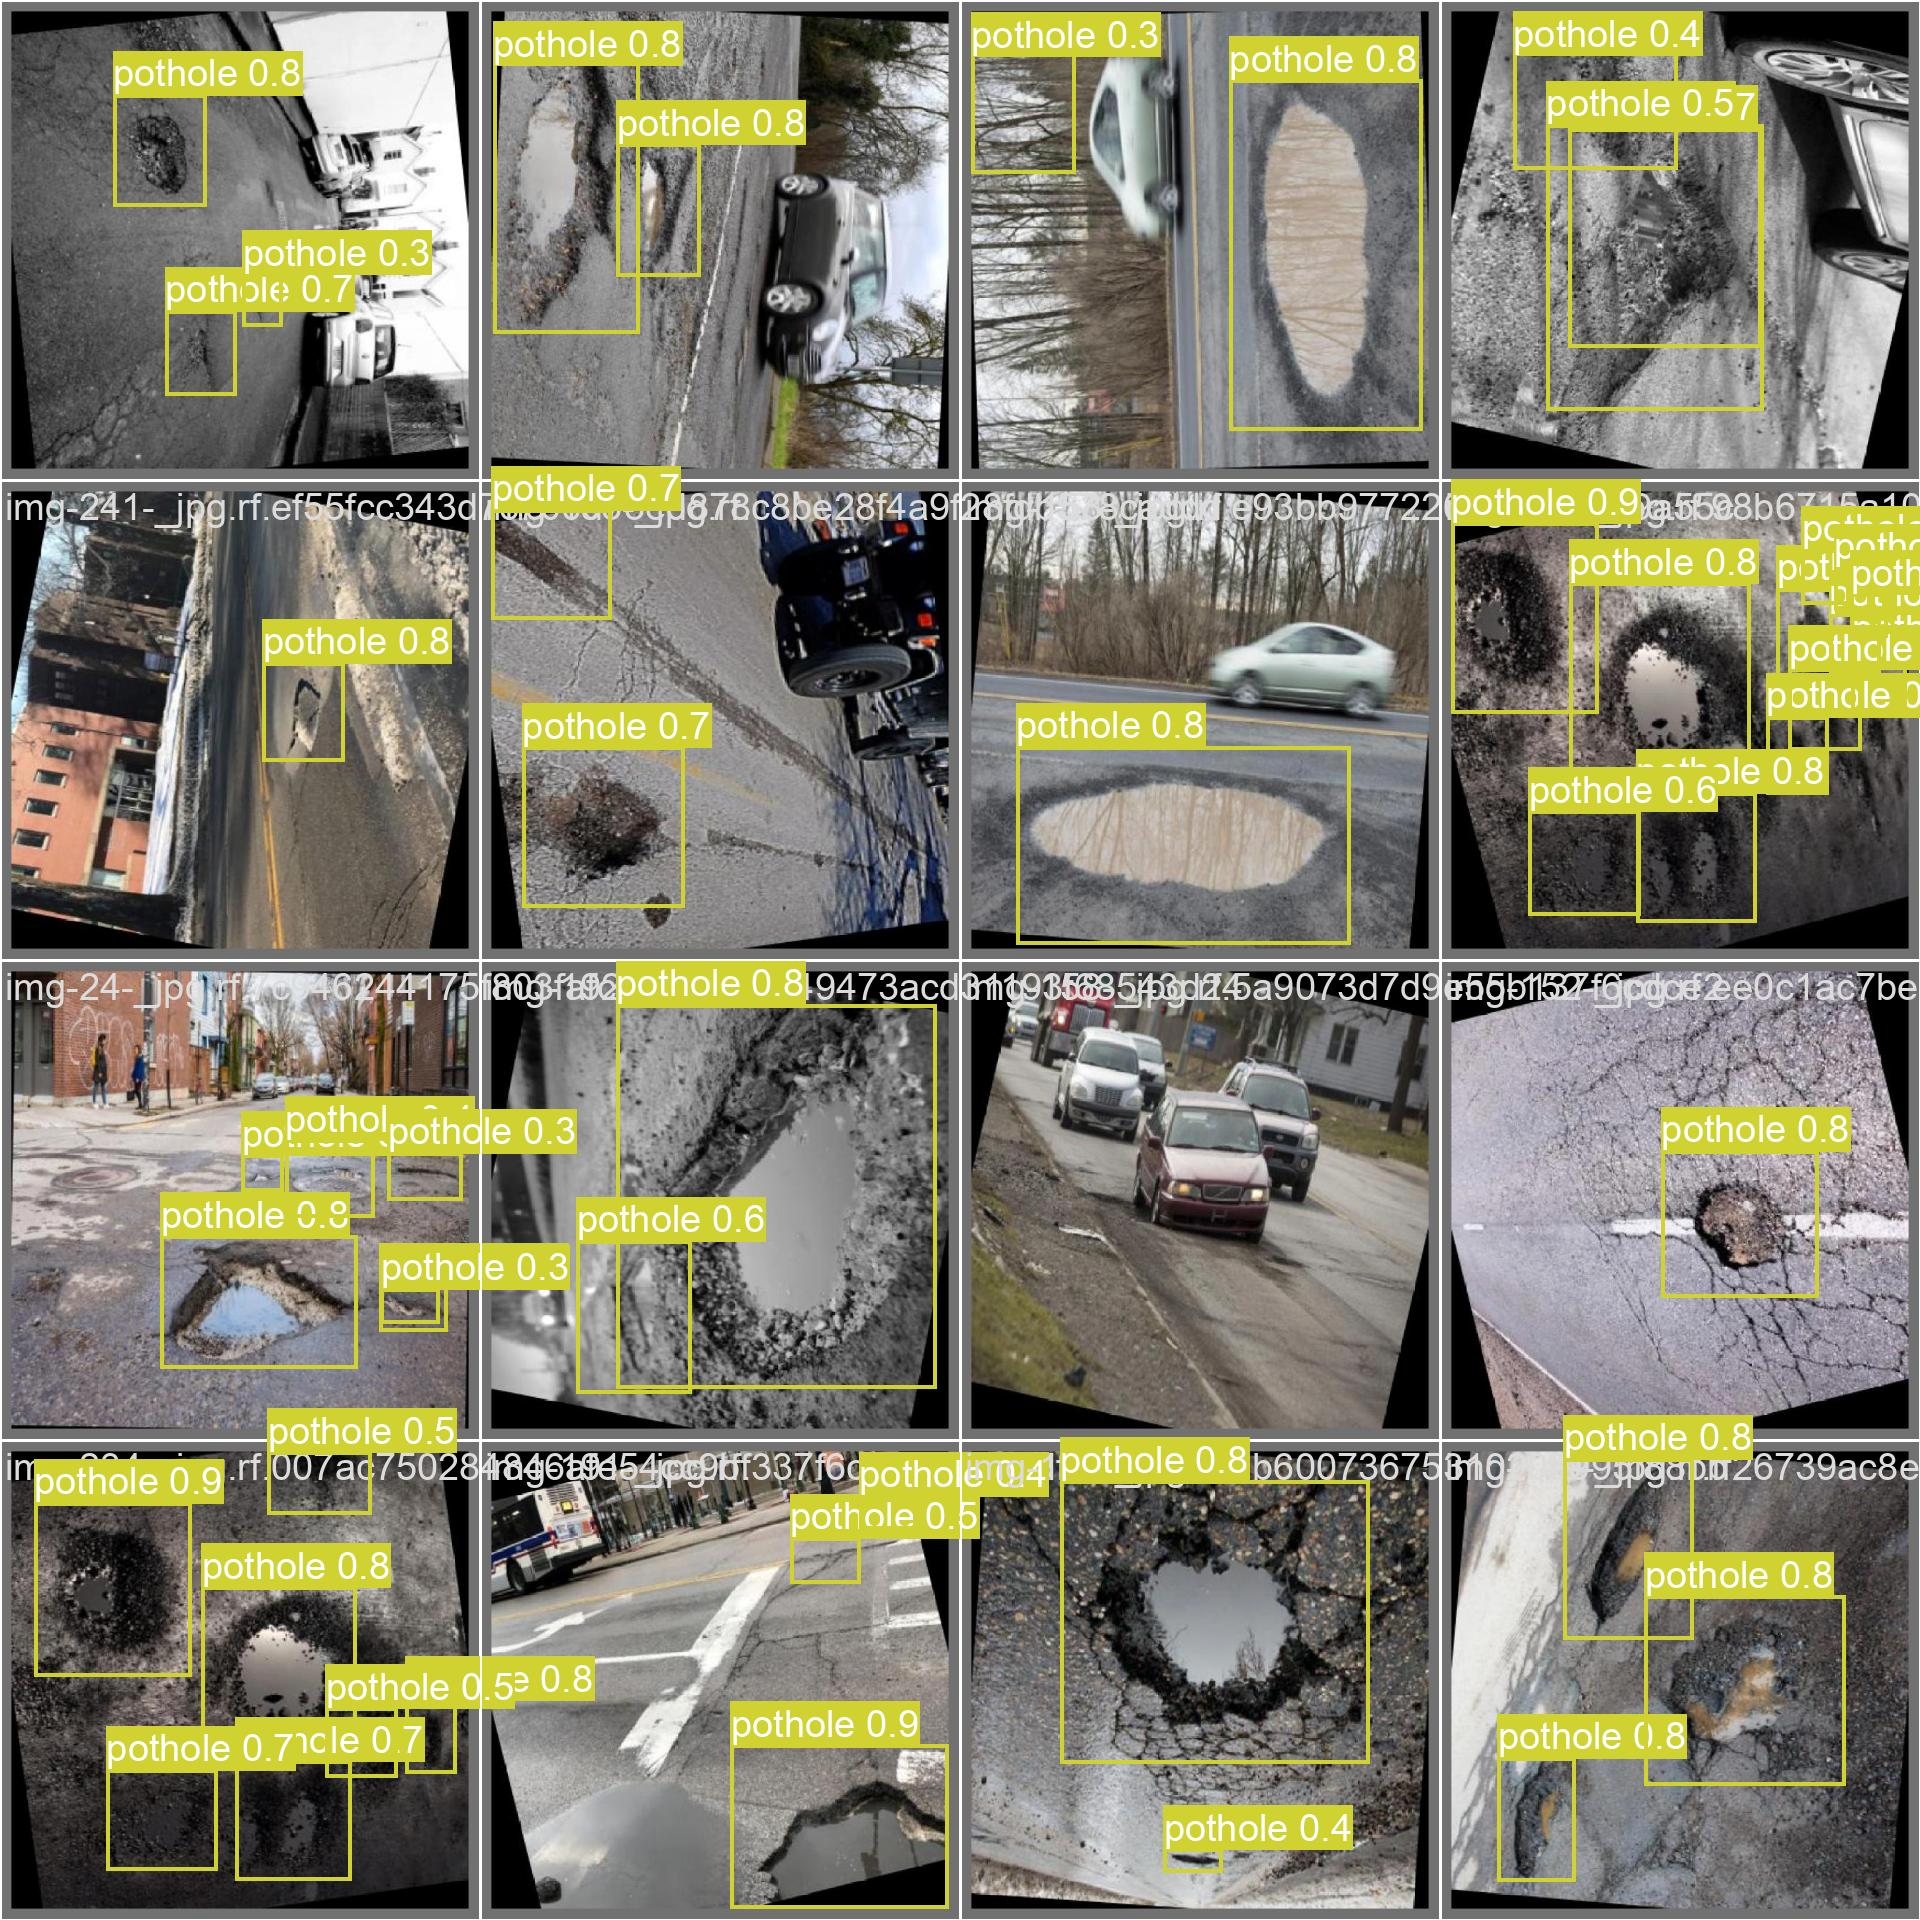

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

/content


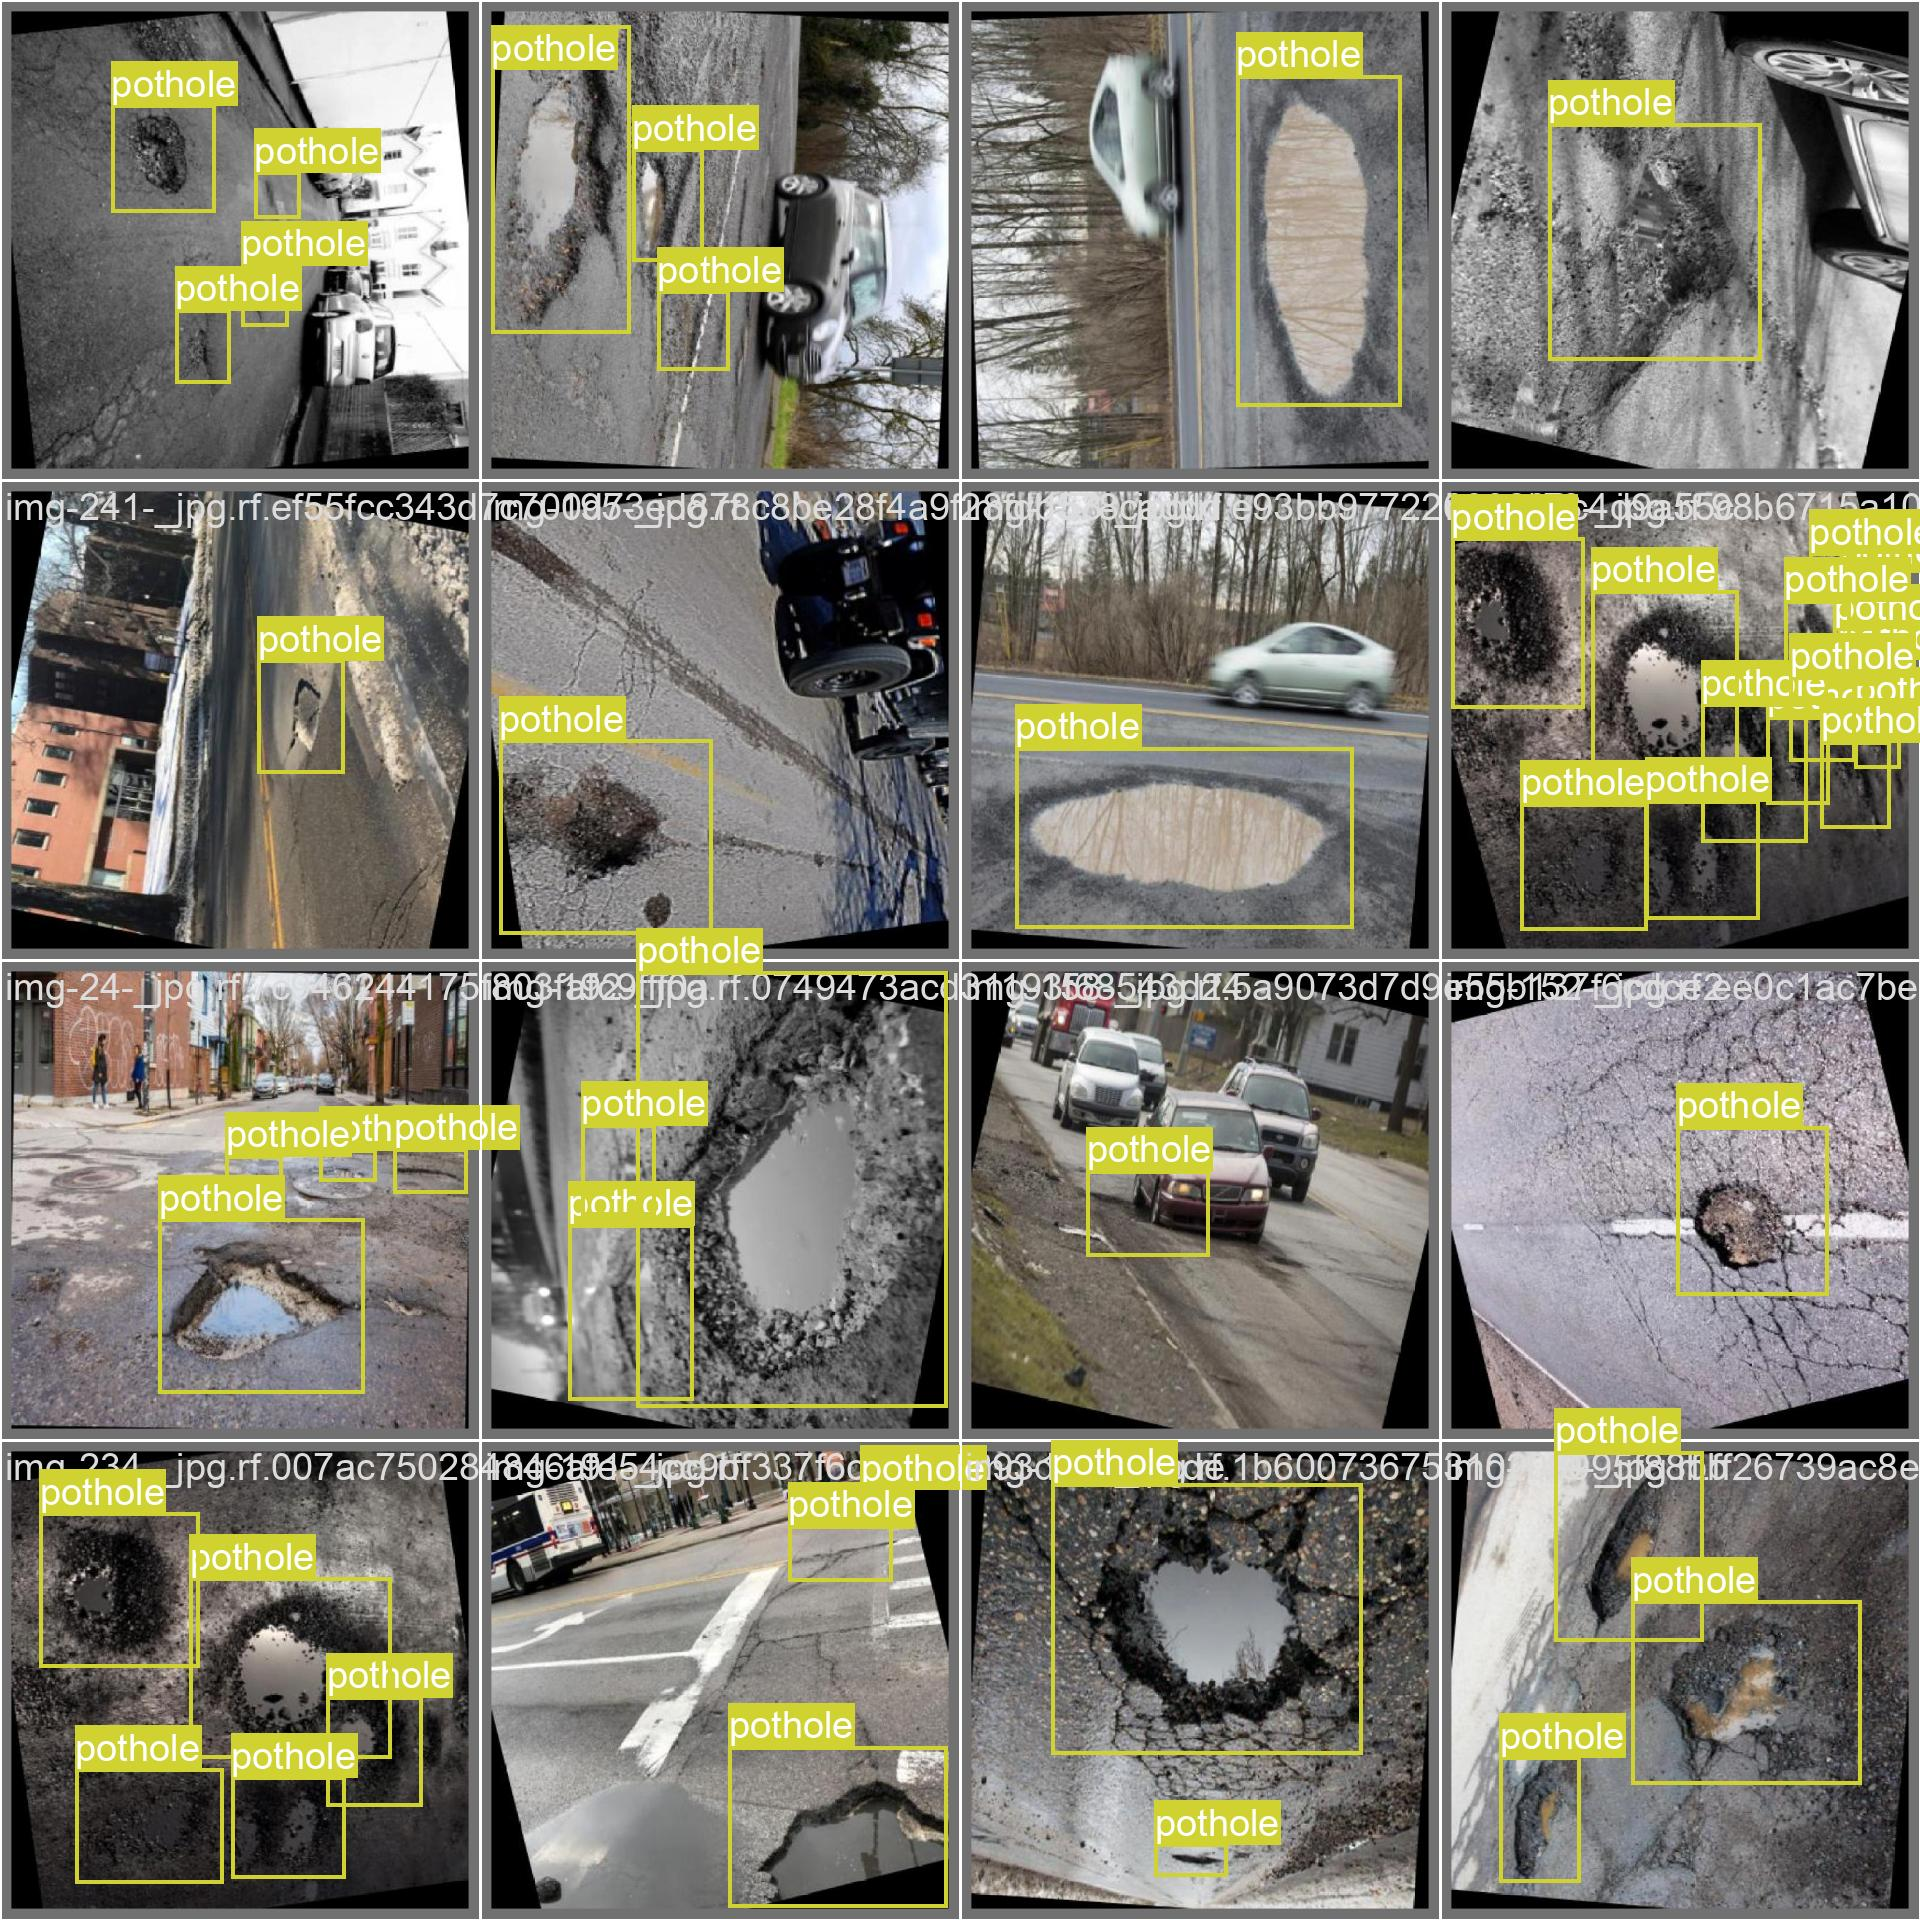

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_labels.jpg', width=600)

/content


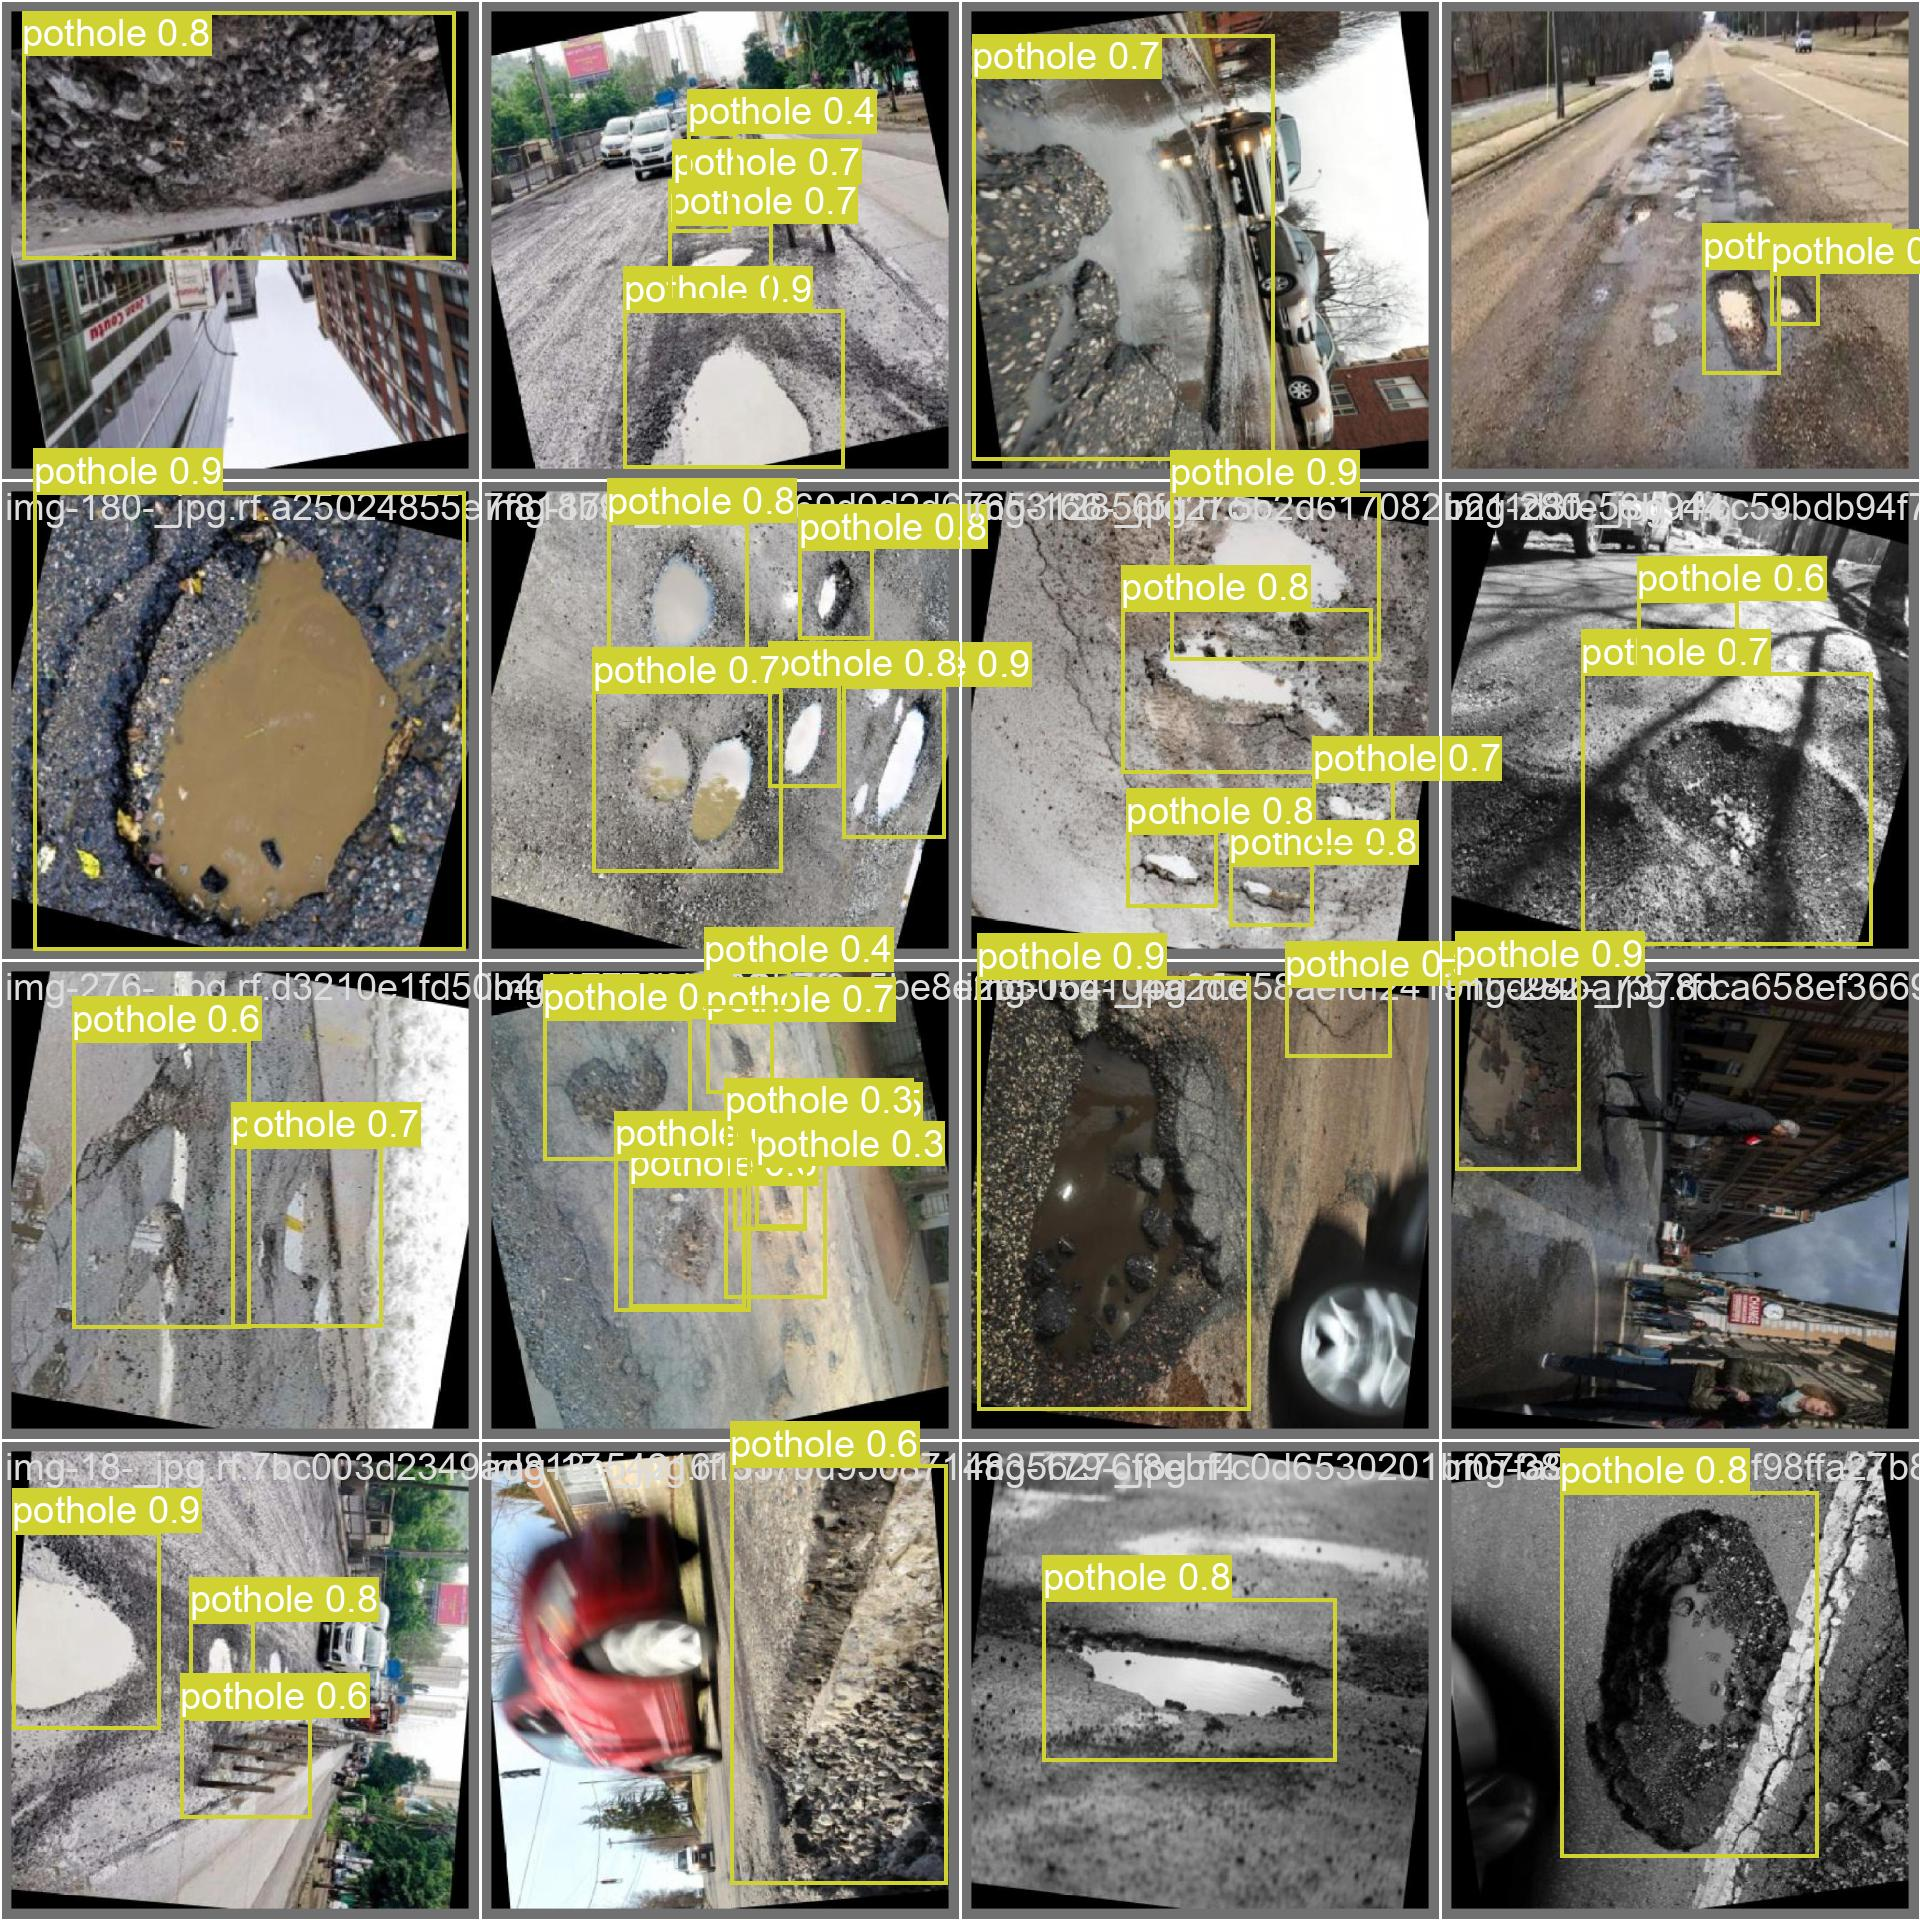

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch2_pred.jpg', width=600)

/content


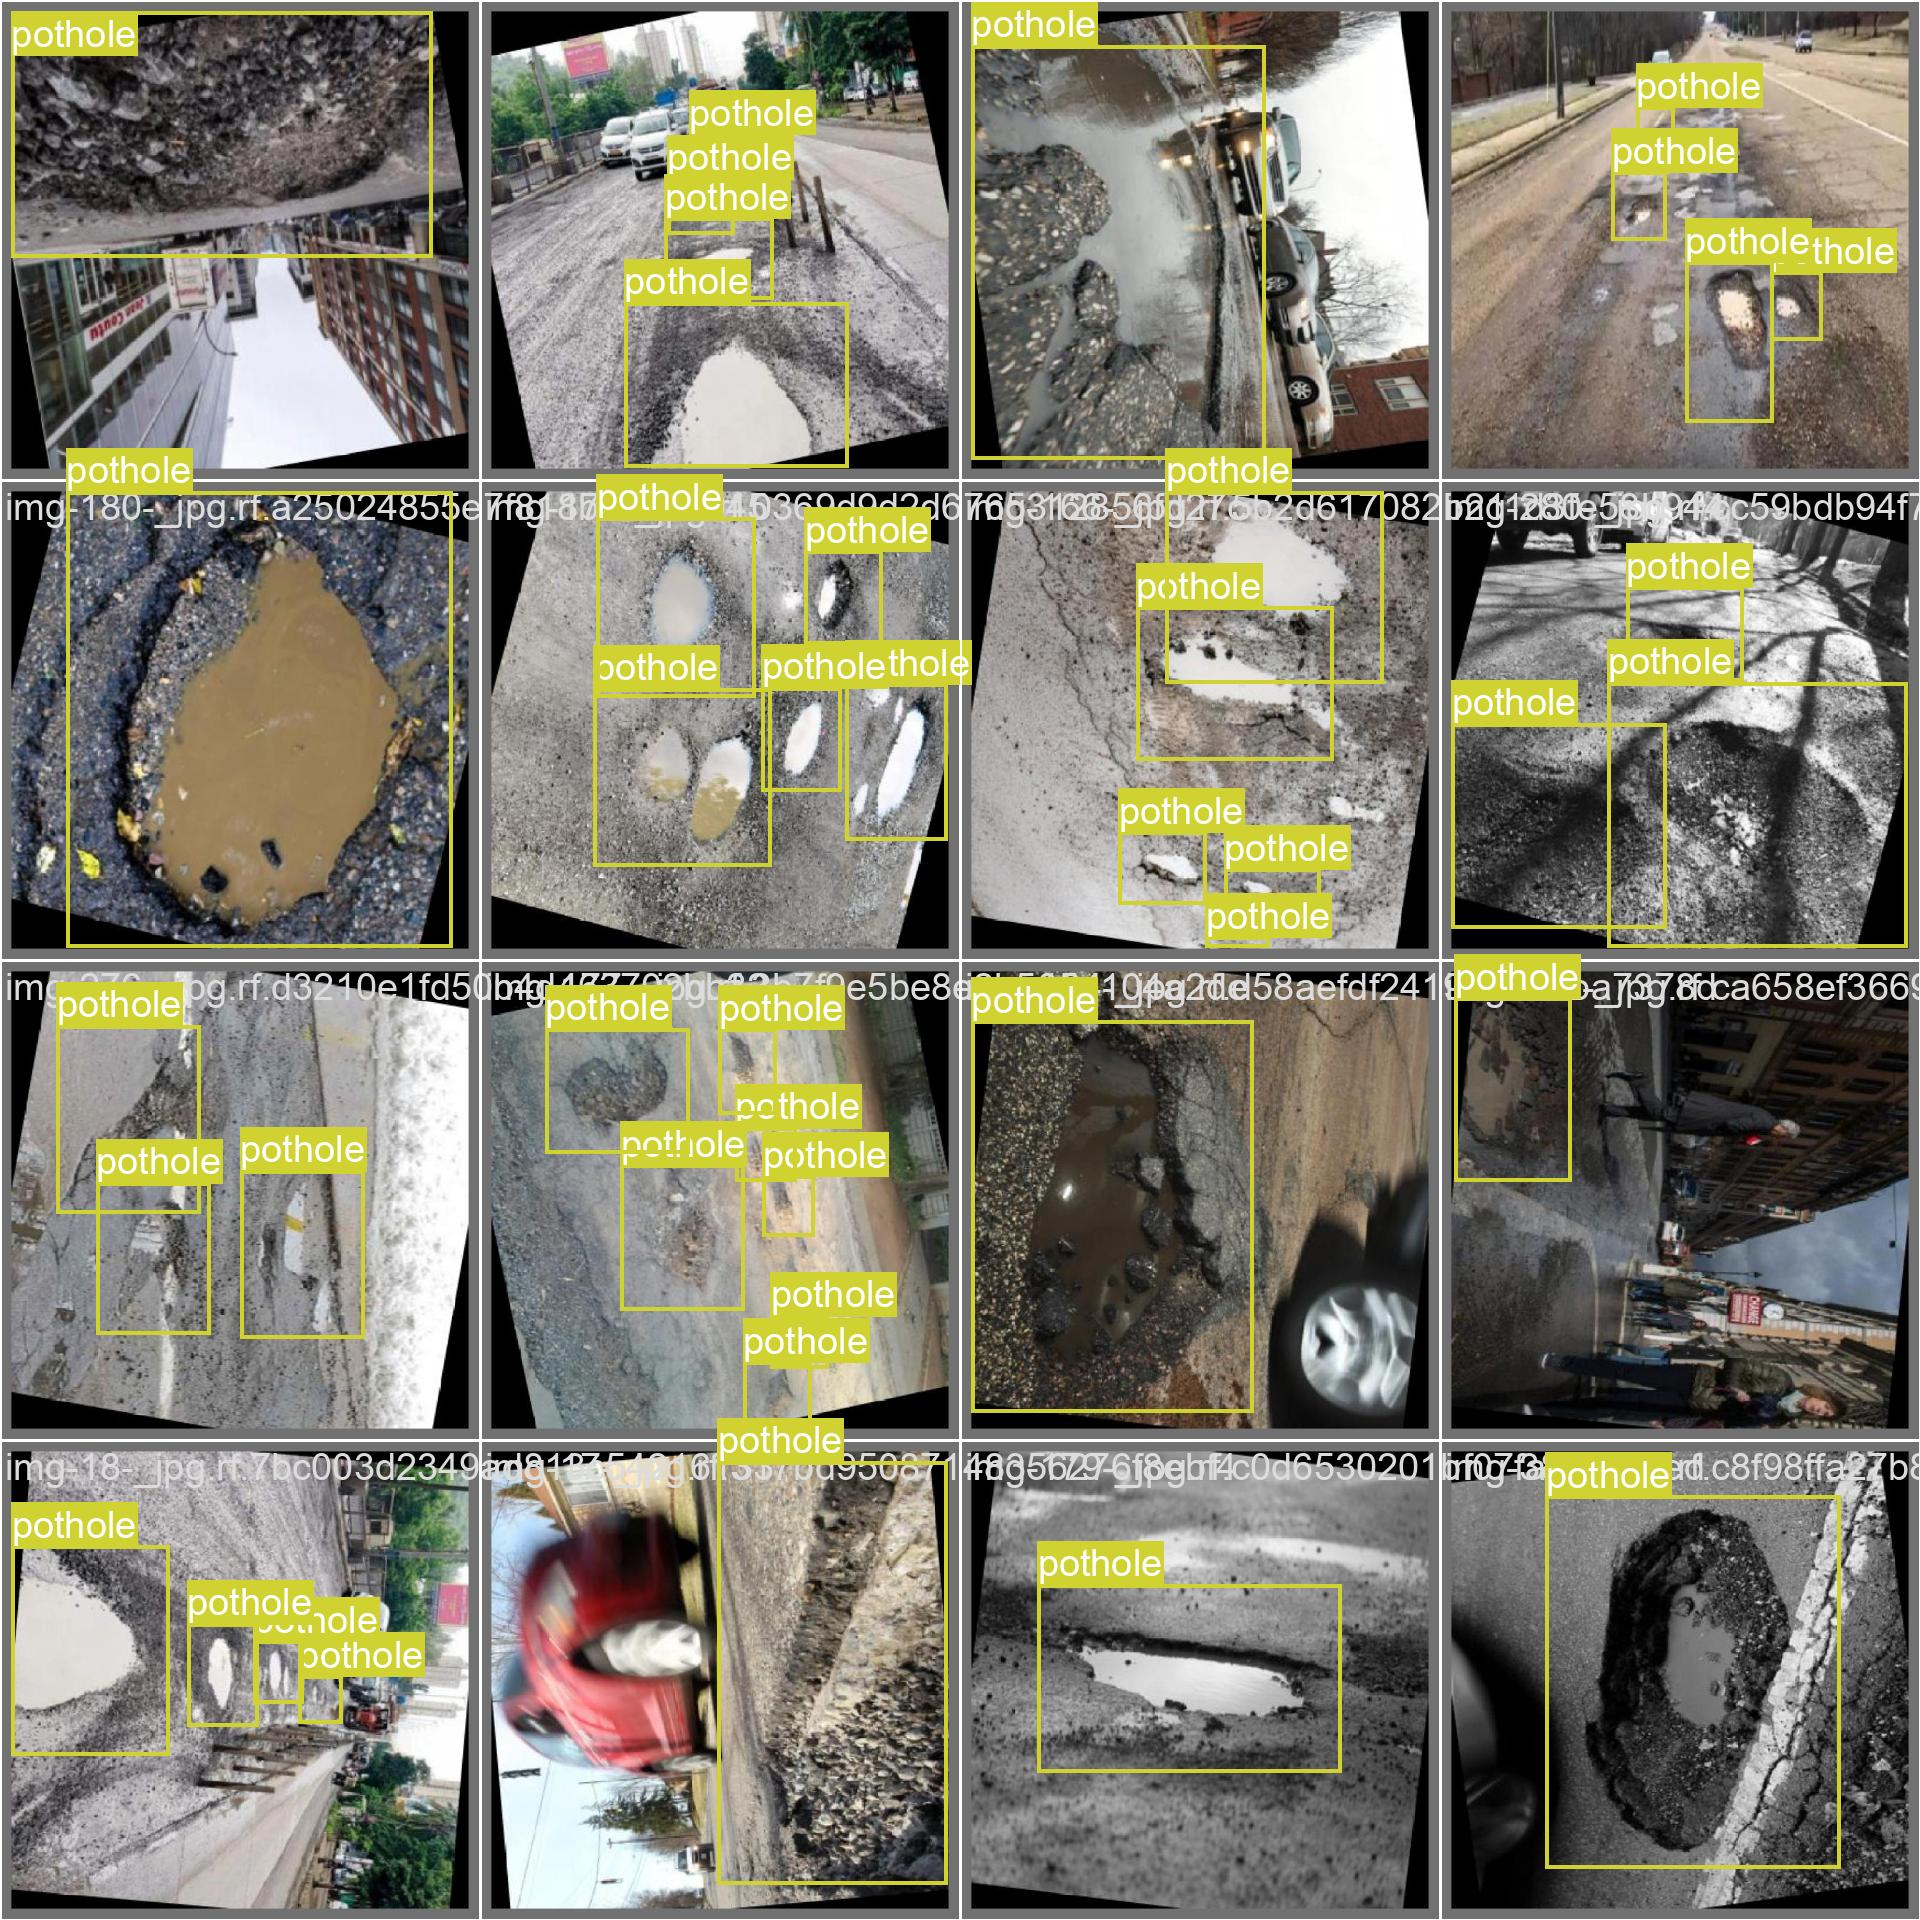

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch2_labels.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-10-27 14:23:41.532746: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 14:23:41.532811: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 14:23:41.532854: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 14:23:41.545132: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 14:23:43.114688: W tensorflow/

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-10-27 14:24:17.356743: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 14:24:17.356797: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 14:24:17.356831: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 14:24:17.364071: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 14:24:18.498427: W tensorflow/

**NOTE:** Let's take a look at few results.

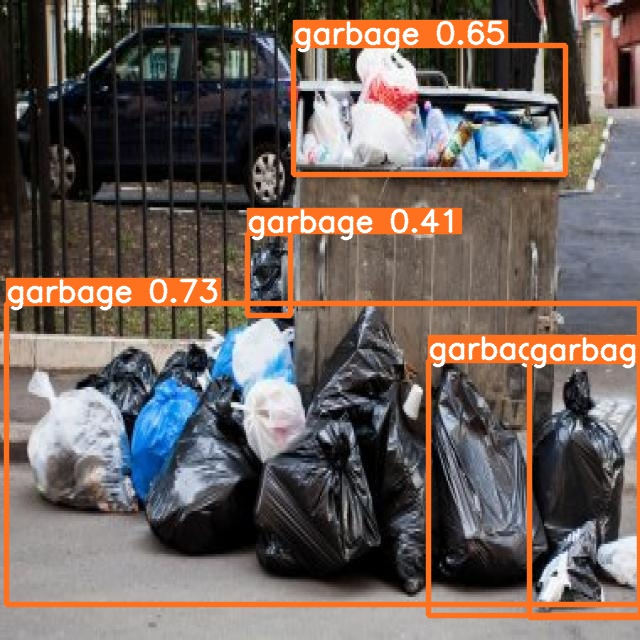

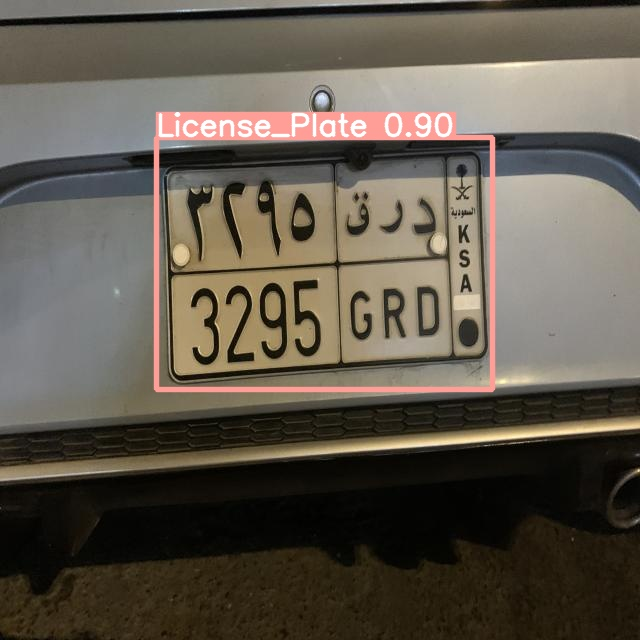

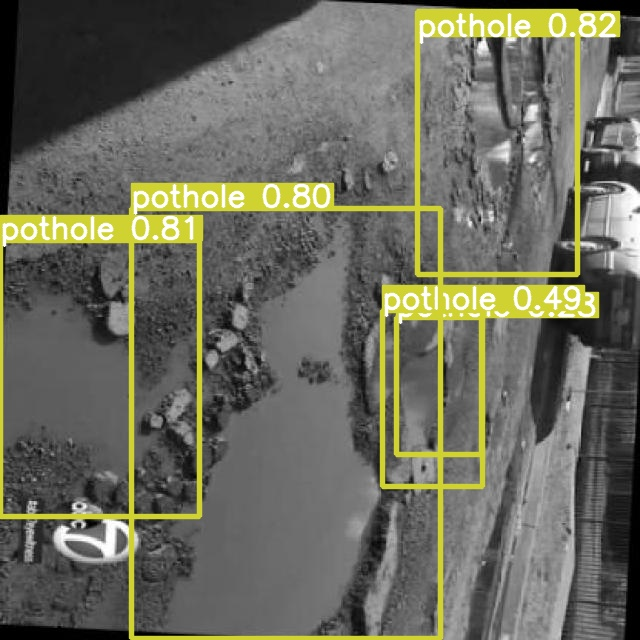

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`
Would you like to continue with the wrong version of ultralytics? y/n: Y
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [51]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on garbage-and-recycle-bins-picture-id487254083_jpg.rf.f720dd59e96b33b2b1ce5265e270644c.jpg


{'predictions': [{'x': 319.5,
   'y': 327.0,
   'width': 639.0,
   'height': 522.0,
   'confidence': 0.6612972021102905,
   'class': 'garbage',
   'class_id': 2,
   'image_path': '/content/datasets/Street-visual-distortions-3/test/images/garbage-and-recycle-bins-picture-id487254083_jpg.rf.f720dd59e96b33b2b1ce5265e270644c.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}

/content


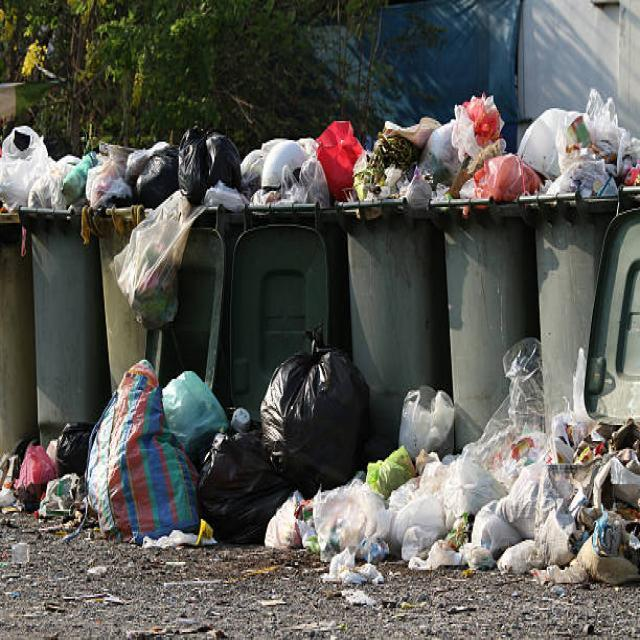

In [57]:
%cd {HOME}
Image(filename=f'/content/datasets/Street-visual-distortions-3/test/images/garbage-and-recycle-bins-picture-id487254083_jpg.rf.f720dd59e96b33b2b1ce5265e270644c.jpg', width=600)

# License Plate Detection and OCR

Running inference on IMG_0533_png.rf.d766593313ee578d9fce8a14b505e22e.jpg


Prediction Details:
Class: License_Plate
Confidence: 0.8435247540473938
License Plate: 7675UXD


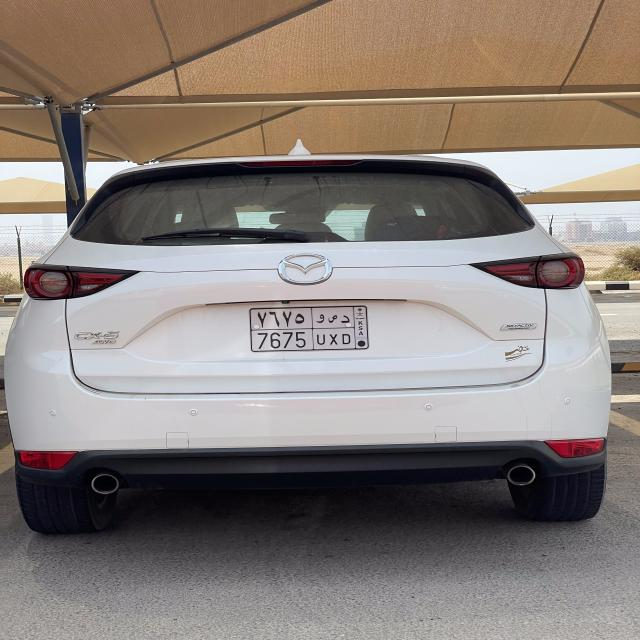

In [ ]:
import os
import random
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pytesseract as pt

# Install Tesseract OCR
# For Linux:
# sudo apt-get install tesseract-ocr
# sudo apt-get install libtesseract-dev
#
# For macOS:
# brew install tesseract

# Set Tesseract executable path
pt.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Replace with the actual path to the Tesseract executable

# Assuming you have the model and dataset objects defined
model = project.version(dataset.version).model

# Path to the test set images
test_set_loc = dataset.location + "/test/images/"

# Choose a random test set image
random_test_image = random.choice(os.listdir(test_set_loc))
print("Running inference on " + random_test_image)

# Perform prediction on the random test image
pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()

# Load the image
image_path = test_set_loc + random_test_image
image = cv2.imread(image_path)
image_resized = cv2.resize(image, (640, 640))  # Resize the image to a smaller size

# Iterate over the prediction results
for k, prediction in enumerate(pred['predictions']):
    cls = prediction['class']

    if cls == 'License_Plate':
        x = prediction['x']
        y = prediction['y']
        width = prediction['width']
        height = prediction['height']

        cv2.rectangle(image_resized, (int(x - width / 2), int(y + height / 2)), (int(x + width / 2), int(y - height / 2)),
                      (255, 0, 0), 2)

        # Draw filled box for class name
        cv2.rectangle(image_resized, (int(x - width / 2), int(y + height / 2)), (int(x + width / 2), int(y + height / 2) + 35),
                      (255, 0, 0), cv2.FILLED)

        # Set label font + draw Text
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(image_resized, cls, (int(x - width / 2 + 6), int(y + height / 2 + 26)), font, 0.5, (255, 255, 255), 1)

        # Crop the license plate region
        crop_frame = image[int(y - height / 2):int(y + height / 2), int(x - width / 2):int(x + width / 2)]

        license_plate_crop_gray = cv2.cvtColor(crop_frame, cv2.COLOR_BGR2GRAY)

        # Apply OCR to read the license plate text
        reader = easyocr.Reader(['en'], gpu=False)
        results = reader.readtext(crop_frame)

        text = ''.join([result[1] for result in results[-2:]])

        # Print the prediction details
        print("Prediction Details:")
        print("Class:", cls)
        print("Confidence:", prediction['confidence'])
        print("License Plate:", text)


        # Display the image with the license plate and text
        cv2_imshow(image)

    else:
        print("No License Plate detected.")

Running inference on IMG_0470_png.rf.3284745fbd70a6c9805694e17fadd852.jpg
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step
Prediction Details:
Class: License_Plate
Confidence: 0.8703820705413818
License Plate: 7702vad


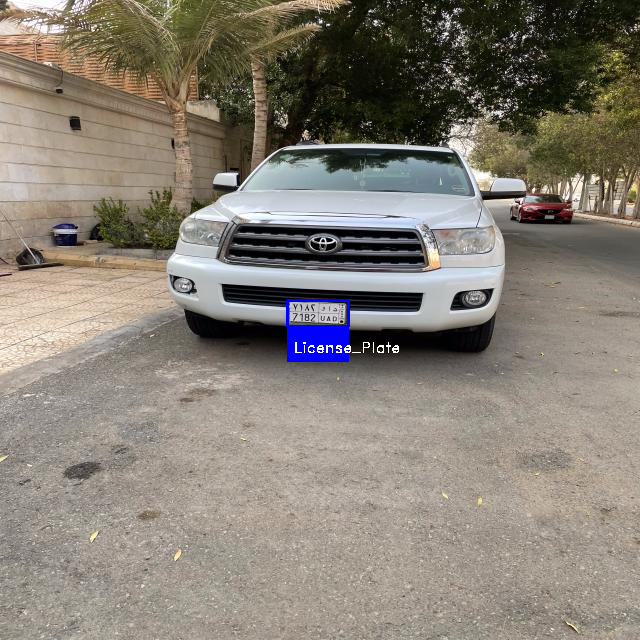

In [ ]:
import os
import random
import cv2
import easyocr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.font_manager import FontProperties
from PIL import Image
import keras_ocr
from google.colab.patches import cv2_imshow
import re


# Assuming you have the model and dataset objects defined
model = project.version(dataset.version).model

# Path to the test set images
test_set_loc = dataset.location + "/test/images/"

# Choose a random test set image
random_test_image = random.choice(os.listdir(test_set_loc))
print("Running inference on " + random_test_image)

# Perform prediction on the random test image
pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()

# Load the image
image_path = test_set_loc + random_test_image
img = cv2.imread(image_path)

# Iterate over the prediction results
for k, prediction in enumerate(pred['predictions']):
    cls = prediction['class']

    if cls == 'License_Plate':
        x = prediction['x']
        y = prediction['y']
        width = prediction['width']
        height = prediction['height']

        cv2.rectangle(img, (int(x - width / 2), int(y + height / 2)), (int(x + width / 2), int(y - height / 2)),
                      (255, 0, 0), 2)

        # Draw filled box for class name
        cv2.rectangle(img, (int(x - width / 2), int(y + height / 2)), (int(x + width / 2), int(y + height / 2) + 35),
                      (255, 0, 0), cv2.FILLED)

        # Set label font + draw Text
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(img, cls, (int(x - width / 2 + 6), int(y + height / 2 + 26)), font, 0.5, (255, 255, 255), 1)

        # Crop the license plate region
        crop_frame = img[int(y - height / 2):int(y + height / 2), int(x - width / 2):int(x + width / 2)]

        cv2.imwrite("plate.jpg", crop_frame)

        # Pre Process Image
        preprocessed_img = preprocessImage("plate.jpg")

        # Apply OCR to read the license plate text
        pipeline = keras_ocr.pipeline.Pipeline()
        images = [preprocessed_img]
        prediction_groups = pipeline.recognize(images)

        # Print the predictions
        print("Prediction Details:")
        print("Class:", cls)
        print("Confidence:", prediction['confidence'])

        for predictions in prediction_groups:
          text = ''.join([result[0] for result in predictions[-2:]])
          print("License Plate:", text)

        cv2_imshow(img)

    else:
        print("No License Plate detected.")

# Final Pipeline + Deploy model on Gradio


In [5]:
! pip install gradio

In [6]:
import gradio as gr
import cv2
import requests
import os

In [7]:
!pip install keras_ocr

In [8]:
import random
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.font_manager import FontProperties
from PIL import Image
import keras_ocr
from google.colab.patches import cv2_imshow
import re
import numpy as np
import pandas as pd


In [9]:
def preprocessImage(image):
    # Read the image
    img = cv2.imread(image)

    # Convert BGR to RGB using PIL
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(img_rgb)

    # Preprocess the image (e.g., resize, enhance, etc.)

    # Convert back to BGR for saving
    img_bgr = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)

    # Save the processed image
    cv2.imwrite('processed.jpg', img_bgr)

    # Return the processed image
    return img_bgr

In [17]:
def match_text_in_csv(text, csv_file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Check if the text exists in any of the DataFrame rows
    is_match = df.apply(lambda row: text in row.values, axis=1).any()

    if is_match:
        violation_type = df.iloc[:, 1].values[0]
        return is_match, violation_type
    else:
        return is_match, None

In [32]:
csv_file_path = "/content/violations_car_list.csv"

In [33]:
def show_preds_image(image_path):
    pred = model.predict(image_path, confidence=40, overlap=30).json()
    img = cv2.imread(image_path)

    # Color mapping dictionary
    color_map = {
        'graffiti': (0, 0, 255),           # Red
        'garbage': (0, 165, 255),          # Orange
        'License_plate': (255, 0, 0),      # Blue
        'pothole': (128, 0, 128),          # Purple
        'Dangerous_wires': (0, 255, 0)     # Green
    }

    # Iterate over the prediction results
    prediction_details = []
    is_legal = True  # Initialize the variable

    for k, prediction in enumerate(pred['predictions']):
        cls = prediction['class']
        x = prediction['x']
        y = prediction['y']
        width = prediction['width']
        height = prediction['height']

        # Get the color for the current class from the color map
        color = color_map.get(cls, (0, 0, 255))  # Default to white if class not found in the color map

        cv2.rectangle(img, (int(x - width / 2), int(y + height / 2)), (int(x + width / 2), int(y - height / 2)),
                      color, 2)

        # Draw filled box for class name
        cv2.rectangle(img, (int(x - width / 2), int(y + height / 2)),
                      (int(x + width / 2), int(y + height / 2) + 35), color, cv2.FILLED)

        # Set label font + draw Text
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(img, cls, (int(x - width / 2 + 6), int(y + height / 2 + 26)), font, 0.5, (255, 255, 255), 1)

        # Print the predictions
        prediction_details.append("Class: " + cls)
        prediction_details.append("Confidence: " + str(prediction['confidence']) + '\n')

        if cls == 'License_Plate':
            # Crop the license plate region
            crop_frame = img[int(y - height / 2):int(y + height / 2), int(x - width / 2):int(x + width / 2)]

            cv2.imwrite("plate.jpg", crop_frame)

            # Pre Process Image
            preprocessed_img = preprocessImage("plate.jpg")

            # Apply OCR to read the license plate text
            pipeline = keras_ocr.pipeline.Pipeline()
            images = [preprocessed_img]
            prediction_groups = pipeline.recognize(images)

            for predictions in prediction_groups:
                text = ''.join([result[0].upper() for result in predictions[-2:]])
                prediction_details.append("License Plate: " + text)

            # Check if the license plate matches a row in the CSV data
            is_legal, violation_type = match_text_in_csv(text, csv_file_path)
            prediction_details.append("License Information: " + ('Violations - ' + violation_type + '\n' if is_legal else 'No Vialations\n'))

    yield cv2.cvtColor(img, cv2.COLOR_BGR2RGB), "\n".join(prediction_details)

In [43]:
def create_demo_examples():
    # NB: Don't download these images to a network FS as it doesn't play well with Gradio.
    import httpx
    import pathlib
    import sys

    example_imgs = {
        "1": "https://www.heraldgoa.in/uploads/news/big_81818_cabe.JPG",
        "2": "https://postcdn.haraj.com.sa/userfiles30/2023-10-15/900x600_27A02EEE-3587-44FC-80F4-0892C67589EA.jpg/900/webp",
        "3": "https://c8.alamy.com/comp/DC335G/waste-and-garbage-refuse-bin-at-the-berlin-wall-east-side-gallery-DC335G.jpg",
        "4": "https://c8.alamy.com/comp/2E42G3E/snow-and-parked-cars-makes-garbage-pickup-difficult-in-new-york-city-where-there-are-no-alleys-so-garbage-has-to-be-put-out-on-the-street-which-makes-2E42G3E.jpg",
        "5": "https://europlateblog.files.wordpress.com/2014/03/ksa-2007_bld-3252_vb2014blog.jpg",
    }
    available_examples = []
    for dest, url in example_imgs.items():
        filepath = pathlib.Path(dest)
        r = httpx.get(url)
        if r.status_code != 200:
            print(f"Could not download '{url}'", file=sys.stderr)
            continue

        with open(filepath, "wb") as f:
            f.write(r.content)
        available_examples.append(str(filepath))
    return available_examples

In [44]:
inputs_image = [
    gr.inputs.Image(type="filepath", label="Input Image")
]
outputs_image = [
    gr.components.Image(type="numpy", label="Output Image"),
    gr.components.Textbox(label="Prediction Details"),
]
interface_image = gr.Interface(
    fn=show_preds_image,
    inputs=inputs_image,
    outputs=outputs_image,
    title="Street Visual Distortions Detector",
    examples=create_demo_examples(),
    cache_examples=False,
    theme=gr.themes.Monochrome()
)

Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
`optional` parameter is deprecated, and it has no effect


In [45]:
gr.TabbedInterface(
    [interface_image],
    tab_names=['Image inference']
).queue().launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://895024c840c2705e56.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
def preprocessImage(image):
    # Read the image
    img = cv2.imread(image)

    # Convert BGR to RGB using PIL
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(img_rgb)

    # Preprocess the image (e.g., resize, enhance, etc.)

    # Convert back to BGR for saving
    img_bgr = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)

    # Save the processed image
    cv2.imwrite('processed.jpg', img_bgr)

    # Return the processed image
    return img_bgr